_____________
# I. Introduction



_______________
# II. Library

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from scipy import stats

from tensorflow import keras

# correlation finder
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

# hyperparameter tuning
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hype
from scipy.stats import expon
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# model evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer,precision_recall_curve,auc,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import adjusted_rand_score

___________
# III. Data Loading

In [57]:
df = pd.read_csv('churn.csv')
df_backup = df

In [58]:
pd.options.display.max_columns = 100
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [59]:
df.shape

(37010, 22)

In [60]:
df.dtypes

user_id                          object
age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [61]:
numlist = ['age','days_since_last_login', 
           'avg_time_spent',
           'avg_transaction_value',
           'avg_frequency_login_days',
           'points_in_wallet']

catlist = ['user_id',
            'gender',
            'region_category',
            'membership_category',
            'joining_date',
            'joined_through_referral',
            'preferred_offer_types',
            'medium_of_operation',
            'internet_option',
            'last_visit_time',
            'used_special_discount',
            'offer_application_preference',
            'past_complaint',
            'complaint_status',
            'feedback']

In [62]:
# numerical feature describe

df[numlist].describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761


In [63]:
# Categorical feature describe

df[catlist].describe().T

,count,unique,top,freq
user_id,37010,36992,b749631fc10ff0da,2
gender,36951,2,F,18497
region_category,31579,3,Town,14135
membership_category,37010,6,Basic Membership,7727
joining_date,37010,1096,2015-06-02,55
joined_through_referral,31568,2,No,15846
preferred_offer_types,36722,3,Gift Vouchers/Coupons,12357
medium_of_operation,31615,3,Desktop,13917
internet_option,37010,3,Wi-Fi,12417
last_visit_time,37010,30101,07:56:41,6


In [64]:
# convert joining date into month-year

df['joining_date'] = pd.to_datetime(df['joining_date'])
df['joining_date'] = df['joining_date'].dt.to_period("M")

In [65]:
# unique value in categorical columns

for i in df[catlist]:
    print(i)
    print()
    print(df[catlist][i].value_counts())
    print('■' * 60)

user_id

b749631fc10ff0da    2
9c8c2db425854d5e    2
9186d6f284e4ac5b    2
a121fe1247bf3d61    2
9f97903015fd0580    2
                   ..
a11563b8312bd92e    1
835a897bb342ae27    1
887c3b0d137541b8    1
9b6a1597dd513b25    1
93b5d0330d24fa15    1
Name: user_id, Length: 36992, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
gender

F    18497
M    18454
Name: gender, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
region_category

Town       14135
City       12744
Village     4700
Name: region_category, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
membership_category

Basic Membership       7727
No Membership          7693
Gold Membership        6799
Silver Membership      5991
Premium Membership     4458
Platinum Membership    4342
Name: membership_category, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
joining_date

2015-07    1103
2017-12    1093
2017-10    1086
2017-08   

_________
# IV. Data Cleaning

### Handling missing value

In [66]:
# Check missing value

def null(df):
    mv = pd.DataFrame(df.isnull().sum()).rename(columns={0:'missing_values'})
    return mv[mv.missing_values > 0].sort_values('missing_values', ascending=False)
null(df)


,missing_values
joined_through_referral,5442
region_category,5431
medium_of_operation,5395
preferred_offer_types,288
gender,59


In [67]:
# percentage missing value

(df[['joined_through_referral','region_category','medium_of_operation','preferred_offer_types','gender']].isnull().sum() / df.shape[0]).round(2) * 100

joined_through_referral    15.0
region_category            15.0
medium_of_operation        15.0
preferred_offer_types       1.0
gender                      0.0
dtype: float64

we can drop missing value with percentage below 5%

In [68]:
df = df.dropna(subset=['gender', 'preferred_offer_types'])

In [69]:
# Impute the missing value of percentage above 10% with mode

df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0], inplace=True)
df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)
df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0], inplace=True)

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_17236\4230496754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0], inplace=True)
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_17236\4230496754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_17236\4230496754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [70]:
# percentage missing value

(df[['joined_through_referral','region_category','medium_of_operation','preferred_offer_types','gender']].isnull().sum() / df.shape[0]).round(2) * 100

joined_through_referral    0.0
region_category            0.0
medium_of_operation        0.0
preferred_offer_types      0.0
gender                     0.0
dtype: float64

### Handling outlier

In [71]:
numlist

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

 age : 0.00%
 days_since_last_login : 5.41%
 avg_time_spent : 2.15%
 avg_transaction_value : 1.93%
 avg_frequency_login_days : 0.84%
 points_in_wallet : 0.22%


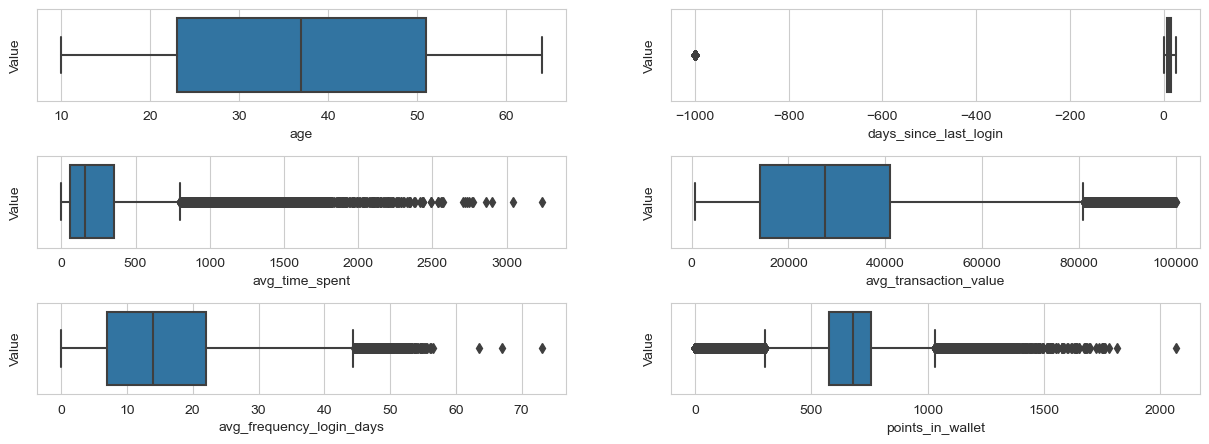

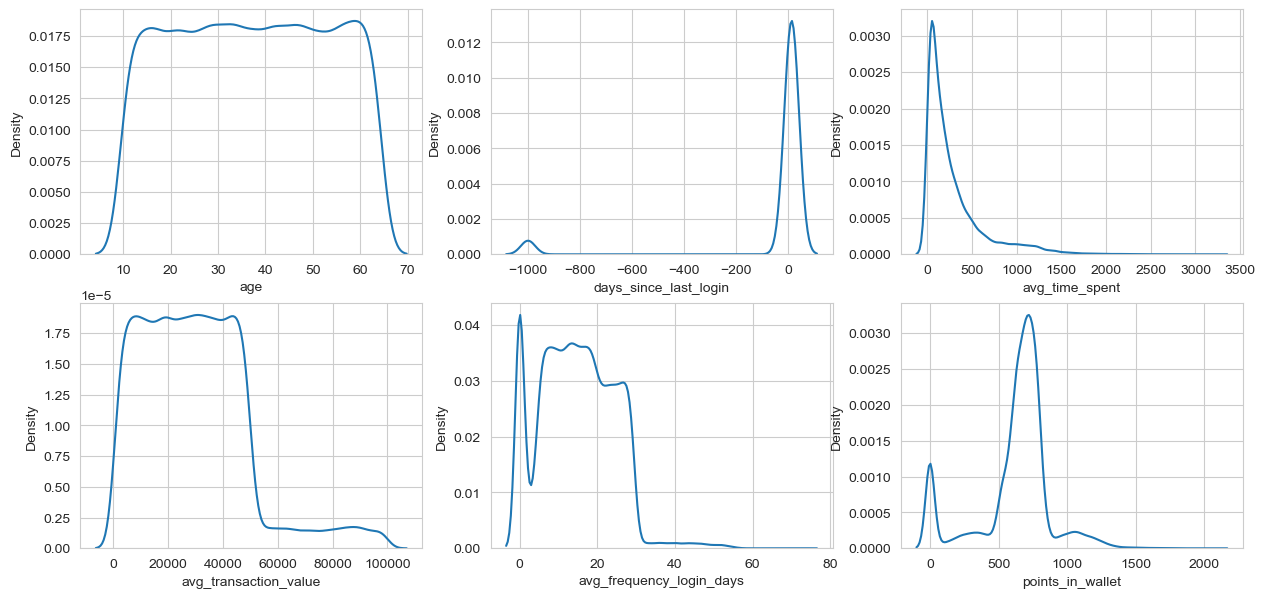

In [72]:
# percentage outlier
for col in df[numlist].columns:
    
    # Identify the outliers using Z-score method
    z_scores = stats.zscore(df[numlist][col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df[numlist].iloc[outliers_index]
    
    # calculate the percentage of outliers
    outliers_percentage = len(outliers) / len(df[numlist][col]) * 100
    print(" {} : {:.2f}%".format(col, outliers_percentage))
    
# Boxplot outlier
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

# check data distribution
plt.figure(figsize=(15,7))
for i, col in enumerate(df[numlist].columns):
    if df[numlist][col].dtype != 'object':
        ax = plt.subplot(2, 3, i+1)
        sns.kdeplot(df[numlist][col], ax=ax)
        plt.xlabel(col)
plt.show()

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_17236\2726553736.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outl_index = df[numlist][((df[numlist] < (Q1 - 1.5 * IQR)) |(df[numlist] > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist()
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_17236\2726553736.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outl_index = df[numlist][((df[numlist] < (Q1 - 1.5 * IQR)) |(df[numlist] > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist()


 age : 0.00%
 days_since_last_login : 0.00%
 avg_time_spent : 0.99%
 avg_transaction_value : 0.70%
 avg_frequency_login_days : 0.27%
 points_in_wallet : 1.62%


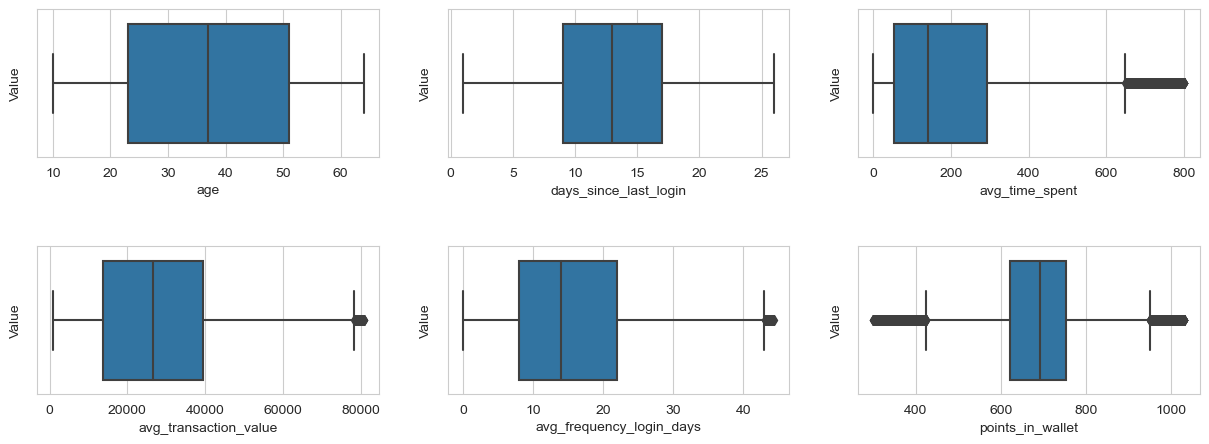

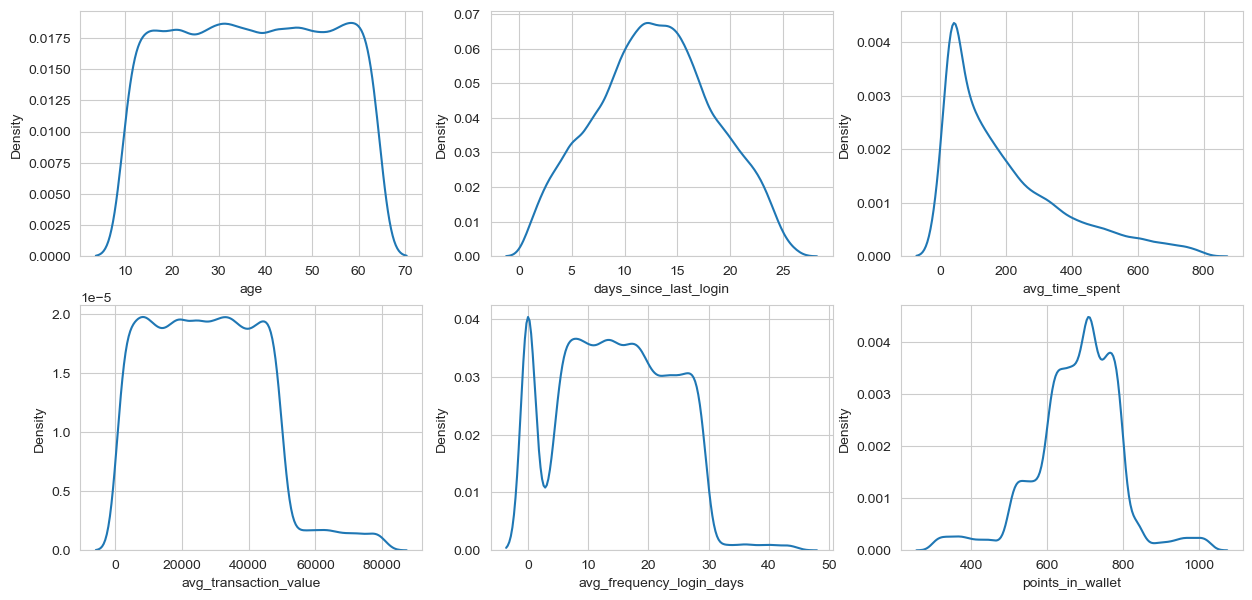

In [73]:
# outlier cleaning

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# outliers into index array
outl_index = df[numlist][((df[numlist] < (Q1 - 1.5 * IQR)) |(df[numlist] > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist()

# drop outlier from dataset
df2 = df.drop(index=outl_index, axis=1)

# percentage outlier
for col in df2[numlist].columns:
    # Identify the outliers using Z-score method
    z_scores = stats.zscore(df2[numlist][col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df2[numlist].iloc[outliers_index]
    # calculate the percentage of outliers
    outliers_percentage = len(outliers) / len(df2[numlist][col]) * 100
    print(" {} : {:.2f}%".format(col, outliers_percentage))
    
# Boxplot outlier
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[numlist].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df2[numlist][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

# check data distribution
plt.figure(figsize=(15,7))
for i, col in enumerate(df2[numlist].columns):
    if df2[numlist][col].dtype != 'object':
        ax = plt.subplot(2, 3, i+1)
        sns.kdeplot(df2[numlist][col], ax=ax)
        plt.xlabel(col)
plt.show()

### Handling duplicate

In [74]:
# check duplicate
df[df.duplicated()].shape

(18, 22)

In [75]:
# drop dulicate
df = df.drop_duplicates()
df.reset_index().shape

(36646, 23)

### Drop unnecessary column

In [76]:
df = df.drop(['user_id', 'last_visit_time','joining_date'], axis=1)

________
# V. Exploratory Data Analysis

In [77]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,Town,No Membership,Yes,Without Offers,Desktop,Wi-Fi,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,Town,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,64,M,Town,Silver Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


1    19827
0    16819
Name: churn_risk_score, dtype: int64


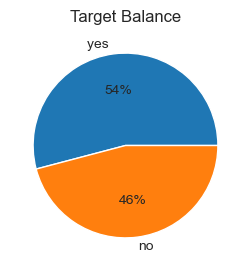

In [78]:
# Check the target distribution

fig, ax = plt.subplots(figsize=(3,3))
ax.pie(df['churn_risk_score'].value_counts(),labels=['yes ','no'],autopct='%0.0f%%')
plt.title("Target Balance")

print(df['churn_risk_score'].value_counts())

In [79]:
numlist = ['age','days_since_last_login', 
           'avg_time_spent',
           'avg_transaction_value',
           'avg_frequency_login_days',
           'points_in_wallet']

catlist = [
            'gender',
            'region_category',
            'membership_category',
            'joining_date',
            'joined_through_referral',
            'preferred_offer_types',
            'medium_of_operation',
            'internet_option',
            'used_special_discount',
            'offer_application_preference',
            'past_complaint',
            'complaint_status',
            'feedback']

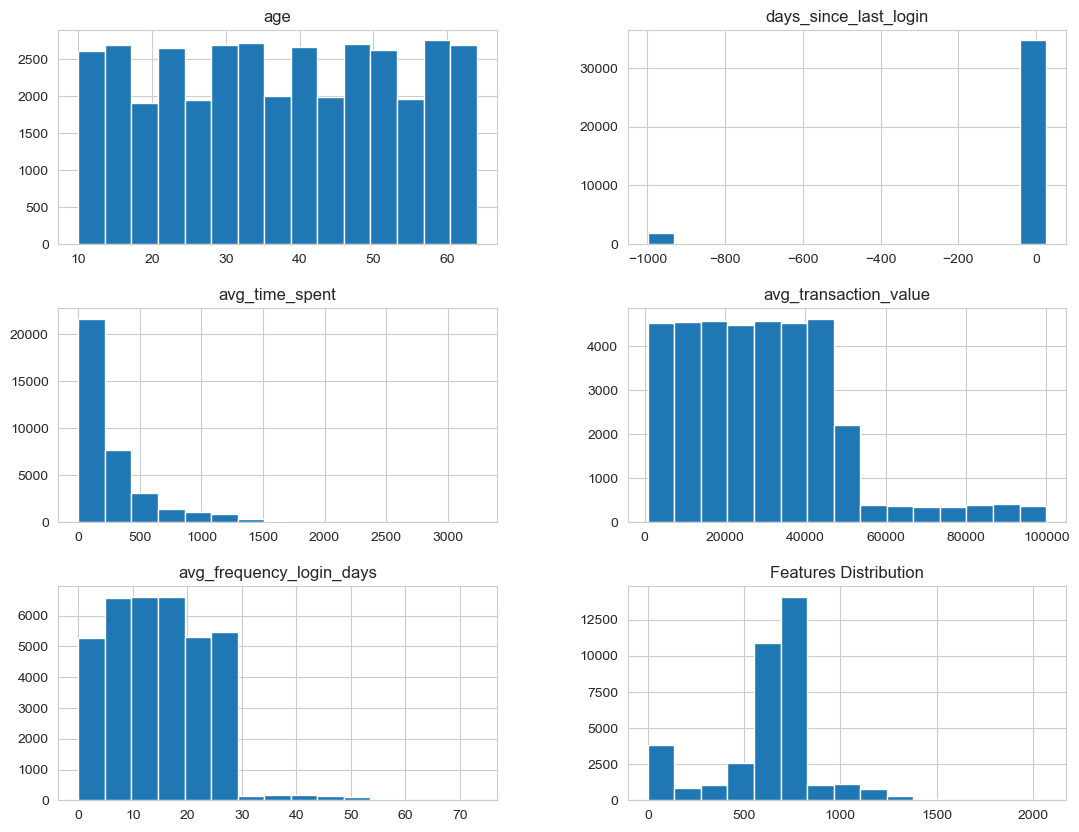

In [80]:
df[numlist].hist(figsize=(13,10),bins = 15)
plt.title("Features Distribution")
plt.show()

<AxesSubplot:xlabel='count', ylabel='gender'>

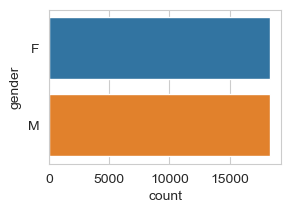

In [81]:
plt.figure(figsize=(3,2))
sns.set_style("whitegrid")
sns.countplot(y='gender', data=df)

<AxesSubplot:xlabel='count', ylabel='region_category'>

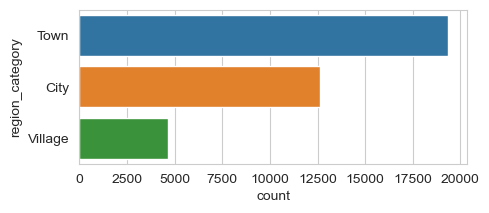

In [82]:
plt.figure(figsize=(5,2))
sns.set_style("whitegrid")
sns.countplot(y='region_category', data=df)

<AxesSubplot:xlabel='count', ylabel='membership_category'>

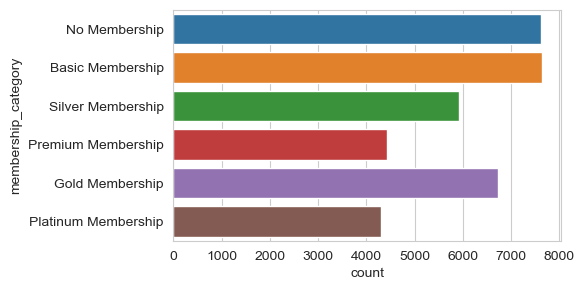

In [83]:
plt.figure(figsize=(5,3))
sns.set_style("whitegrid")
sns.countplot(y='membership_category', data=df)

<AxesSubplot:xlabel='count', ylabel='joined_through_referral'>

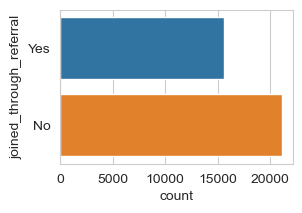

In [84]:
plt.figure(figsize=(3,2))
sns.set_style("whitegrid")
sns.countplot(y='joined_through_referral', data=df)

<AxesSubplot:xlabel='count', ylabel='preferred_offer_types'>

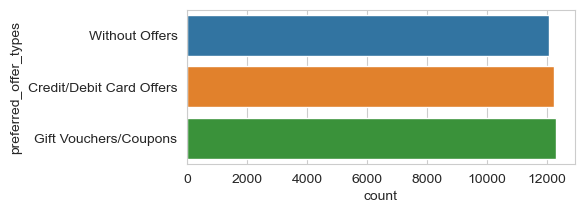

In [85]:
plt.figure(figsize=(5,2))
sns.set_style("whitegrid")
sns.countplot(y='preferred_offer_types', data=df)

<AxesSubplot:xlabel='count', ylabel='medium_of_operation'>

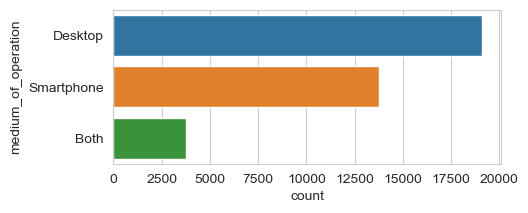

In [86]:
plt.figure(figsize=(5,2))
sns.set_style("whitegrid")
sns.countplot(y='medium_of_operation', data=df)

<AxesSubplot:xlabel='count', ylabel='internet_option'>

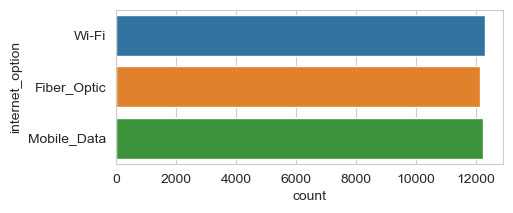

In [87]:
plt.figure(figsize=(5,2))
sns.set_style("whitegrid")
sns.countplot(y='internet_option', data=df)

<AxesSubplot:xlabel='count', ylabel='used_special_discount'>

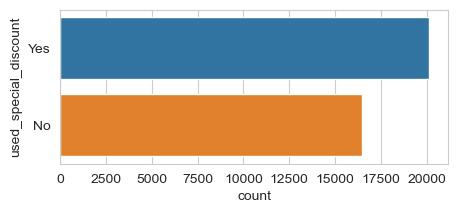

In [88]:
plt.figure(figsize=(5,2))
sns.set_style("whitegrid")
sns.countplot(y='used_special_discount', data=df)

<AxesSubplot:xlabel='count', ylabel='offer_application_preference'>

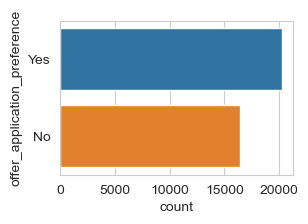

In [89]:
plt.figure(figsize=(3,2))
sns.set_style("whitegrid")
sns.countplot(y='offer_application_preference', data=df)

<AxesSubplot:xlabel='count', ylabel='past_complaint'>

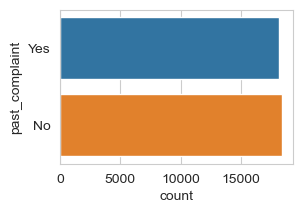

In [90]:
plt.figure(figsize=(3,2))
sns.set_style("whitegrid")
sns.countplot(y='past_complaint', data=df)

<AxesSubplot:xlabel='count', ylabel='complaint_status'>

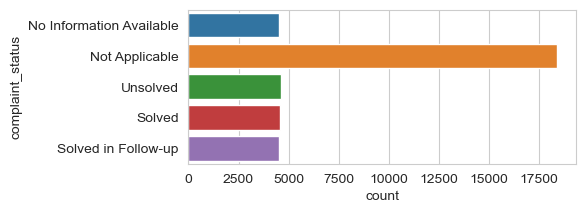

In [91]:
plt.figure(figsize=(5,2))
sns.set_style("whitegrid")
sns.countplot(y='complaint_status', data=df)

<AxesSubplot:xlabel='count', ylabel='feedback'>

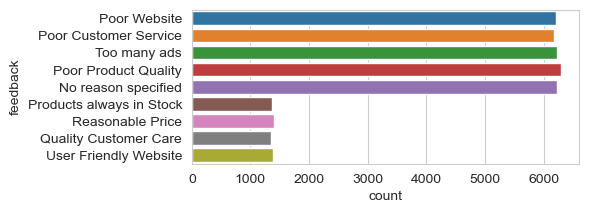

In [92]:
plt.figure(figsize=(5,2))
sns.set_style("whitegrid")
sns.countplot(y='feedback', data=df)

In [93]:
phik_corr = df.phik_matrix(interval_cols='churn_risk_score')
plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map="Accent_r", 
                        title=r"correlation categorical and numerical", 
                        figsize=(10,5))
plt.show()

C:\Users\TOSHIBA\AppData\Roaming\Python\Python39\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable avg_time_spent is large: 24056. Are you sure this is not an interval variable? Analysis for pairs of variables including avg_time_spent can be slow.
  warnings.warn(
C:\Users\TOSHIBA\AppData\Roaming\Python\Python39\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable avg_transaction_value is large: 36551. Are you sure this is not an interval variable? Analysis for pairs of variables including avg_transaction_value can be slow.
  warnings.warn(
C:\Users\TOSHIBA\AppData\Roaming\Python\Python39\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable points_in_wallet is large: 23407. Are you sure this is not an interval variable? Analysis for pairs of variables including points_in_wallet can be slow.
  warnings.warn(
